# AV7 - QUESTÃO 1

Considere a função:$f(x) = \frac{1}{2}\,k\,x^2$ onde k é a constante elástica de uma mola. Essa função representa a energia potencial elástica acumulada em uma mola quando comprimida ou esticada por uma distância x a partir da posição de equilíbrio. Assuma que k=200N/m (valor típico para uma mola rígida).
 

## a) Visualização e análise analítica


- Plote o gráfico da função f(x) no intervalo de x=0 a x=0,2 metros.

- Obtenha, se possível, a função primitiva (isto é, a integral indefinida de f(x)).

- Plote também a função primitiva no mesmo intervalo.

- Usando a função primitiva, calcule o valor da integral definida entre 0 e 0,2 m.

- Comente:
  - O valor obtido representa energia? Trabalho? Interprete fisicamente o resultado.
  - O gráfico da função primitiva faz sentido no contexto físico?

Primitiva simbólica: F(x) = 33.3333333333333*x**3


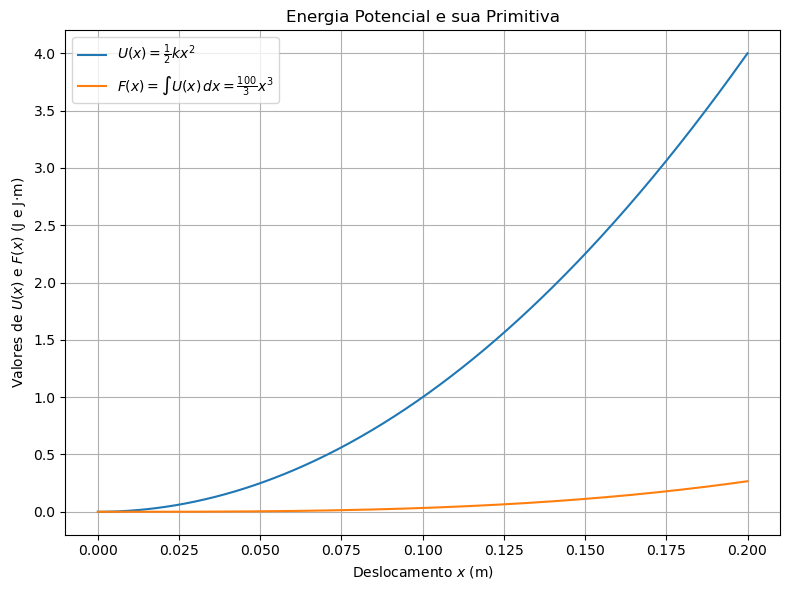

Integral definida ∫₀^0.2 U(x) dx = 0.266667 J·m


In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

k = 200.0  # constante elástica (N/m)

# 1. Definição numérica de x e f(x)
x_vals = np.linspace(0, 0.2, 400)         # de 0 a 0.2 m
f_vals = (k * x_vals**2) / 2              # U(x) = 1/2 k x^2, em joules

# 2. Cálculo simbólico da primitiva F(x)
x = sp.symbols('x')
f_sym = k * x**2 / 2
F_sym = sp.integrate(f_sym, x)
F_sym = sp.simplify(F_sym)
print("Primitiva simbólica: F(x) =", F_sym)  

# 3. Função Python a partir da expressão simbólica
F = sp.lambdify(x, F_sym, 'numpy')

# 4. Plots
plt.figure(figsize=(8,6))
plt.plot(x_vals, f_vals,
         label=r'$U(x)=\frac{1}{2}kx^2$')        
plt.plot(x_vals, F(x_vals),
         label=r'$F(x)=\int U(x)\,dx=\frac{100}{3}x^3$')
plt.xlabel('Deslocamento $x$ (m)')
plt.ylabel('Valores de $U(x)$ e $F(x)$ (J e J·m)')
plt.title('Energia Potencial e sua Primitiva')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Cálculo da integral definida
I = F(0.2) - F(0)
print(f"Integral definida ∫₀^{0.2} U(x) dx = {I:.6f} J·m")


## Resposta

- **Primitiva simbólica**  
  $$
    F(x) = \int \frac{1}{2}\,k\,x^2 \,dx
         = \frac{k}{6}\,x^3
         = \frac{100}{3}\,x^3
  $$

- **Integral definida**  
  $$
    \int_{0}^{0.2} \frac{1}{2}\cdot200\,x^2\,dx
    = \left[\frac{100}{3}x^3\right]_{0}^{0.2}
    = 0{,}2666667\;\mathrm{J\cdot m}
  $$

- **Interpretação física**  
  - O valor da integral corresponde à **área sob a curva** de energia potencial versus deslocamento, tendo unidades de J·m (energia × deslocamento).  
  - Não representa diretamente energia (J) nem trabalho (J); é uma quantificação matemática da área sob $U(x)$.

- **Gráfico da primitiva**  
  - A curva cúbica $F(x)\propto x^3 $ cresce mais rapidamente que $U(x)$.  
  - Faz sentido como antiderivada de $U(x)$, mas não possui interpretação física direta em termos de energia ou trabalho em mecânica de molas.


----
## b) Integração pela regra do trapézio

- Calcule numericamente a integral definida de f(x) entre 0 e 0,2 usando a regra do trapézio com n=10 subintervalos.

- Calcule o erro absoluto em relação ao valor exato obtido no item anterior.

- Comente sobre o comportamento do método.

Regra do trapézio (n=10): 0.268000 J·m
Valor exato:             0.266667 J·m
Erro absoluto:           0.001333 J·m


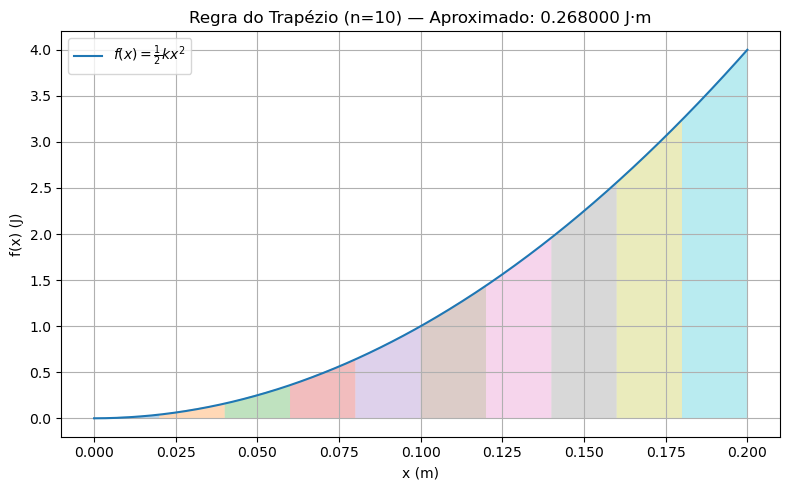

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k = 200.0  # constante elástica (N/m)

def f(x):
    return 0.5 * k * x**2

# Intervalo e subdivisões
a, b = 0.0, 0.2
n = 10
h = (b - a) / n

# Pontos para a regra do trapézio
x_nodes = np.linspace(a, b, n + 1)
y_nodes = f(x_nodes)

# Cálculo pela regra do trapézio
I_trap = (h / 2) * (y_nodes[0] + 2 * np.sum(y_nodes[1:-1]) + y_nodes[-1])

# Valor exato da integral
I_exact = (k / 6) * b**3

# Erro absoluto
erro = abs(I_trap - I_exact)

print(f"Regra do trapézio (n={n}): {I_trap:.6f} J·m")
print(f"Valor exato:             {I_exact:.6f} J·m")
print(f"Erro absoluto:           {erro:.6f} J·m")

# Plot da função e dos trapézios
x_plot = np.linspace(a, b, 400)
plt.figure(figsize=(8, 5))

# Curva exata        
plt.plot(x_plot, f(x_plot), label=r'$f(x)=\frac{1}{2}kx^2$')

# Desenho dos trapézios
for i in range(n):
    xs = [x_nodes[i], x_nodes[i], x_nodes[i+1], x_nodes[i+1]]
    ys = [0, y_nodes[i], y_nodes[i+1], 0]
    plt.fill(xs, ys, alpha=0.3)

plt.xlabel('x (m)')
plt.ylabel('f(x) (J)')
plt.title(f'Regra do Trapézio (n={n}) — Aproximado: {I_trap:.6f} J·m')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Resposta:

- **Tendência de superestimação**  
  Como $f(x)=\tfrac12kx^2$ é uma função convexa (côncava para cima), cada trapézio forma um “telhado” acima da curva verdadeira, fazendo com que a soma das áreas dos trapézios seja ligeiramente **maior** do que a área exata.

- **Erro relativamente pequeno**  
  Com apenas $n=10$ subintervalos, o erro absoluto ficou em cerca de $0{,}00133$ J·m, ou seja, um erro relativo de aproximadamente **0,5 %** — já um resultado bastante satisfatório para muitas aplicações práticas.

- **Ordem de convergência $O(h^2)$**  
  O método do trapézio tem erro que escala como $h^2$, onde $h=(b-a)/n$. Assim, ao dobrar o número de subintervalos ($n\to2n$), o erro tende a diminuir em cerca de um fator de quatro.

- **Suavidade da função favorece o método**  
  Para funções polinomiais suaves (como a quadrática que temos aqui), mesmo valores modestos de $n$ fornecem aproximações muito boas. Em contraste, funções com descontinuidades ou oscilações exigiriam $n$ bem maior para alcançar precisão similar.

- **Trade-off custo vs. precisão**  
  Aumentar $n$ reduz o erro, mas consome mais avaliações de $f(x)$ e, portanto, mais tempo de processamento. Em aplicações em que cada avaliação é cara, vale avaliar se o ganho de precisão justifica o custo computacional adicional.


----

## c) Integração pela regra de Simpson

- Calcule a mesma integral usando a regra de Simpson com n=10 subintervalos.

- Compare o resultado com o valor exato e com o obtido pela regra do trapézio.

- Qual método se mostrou mais preciso neste caso?

In [1]:
import numpy as np

# --- Problema (c): Regra de Simpson (n = 10) e comparação com Trapézio ---
# Integrando U(x) = 0.5 * k * x^2 no intervalo [a, b] com k = 200 N/m.
# Também calculamos o valor exato e comparamos os erros.

def f(x, k=200.0):
    return 0.5 * k * x**2

def integral_exata(a, b, k=200.0):
    # ∫ 0.5 k x^2 dx = (k/6) x^3
    return (k/6.0) * (b**3 - a**3)

def trapezio(f, a, b, n, k=200.0):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x, k)
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

def simpson(f, a, b, n, k=200.0):
    if n % 2 != 0:
        raise ValueError("n deve ser par para a regra de Simpson composta.")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x, k)
    return (h/3.0)*(y[0] + y[-1] + 4.0*y[1:-1:2].sum() + 2.0*y[2:-1:2].sum())

if __name__ == "__main__":
    k = 200.0
    a, b = 0.0, 0.2
    n = 10  # par
    
    I_exato = integral_exata(a, b, k)
    I_trap = trapezio(f, a, b, n, k)
    I_simp = simpson(f, a, b, n, k)
    
    err_trap = abs(I_trap - I_exato)
    err_simp = abs(I_simp - I_exato)
    
    print(f"Parâmetros: k={k}, intervalo=[{a}, {b}], n={n}")
    print(f"Valor exato:           {I_exato:.12f}")
    print(f"Trapézio (n={n}):      {I_trap:.12f}   | erro abs = {err_trap:.12e}")
    print(f"Simpson  (n={n}):      {I_simp:.12f}   | erro abs = {err_simp:.12e}")
    
    if err_simp < err_trap:
        melhor = "Simpson"
    elif err_trap < err_simp:
        melhor = "Trapézio"
    else:
        melhor = "Empate"
    print(f"Método mais preciso neste caso: {melhor}")

Parâmetros: k=200.0, intervalo=[0.0, 0.2], n=10
Valor exato:           0.266666666667
Trapézio (n=10):      0.268000000000   | erro abs = 1.333333333333e-03
Simpson  (n=10):      0.266666666667   | erro abs = 1.110223024625e-16
Método mais preciso neste caso: Simpson


## Resposta:

Para $U(x)=\frac{1}{2}kx^2$ com $k=200$ no intervalo $[0,0.2]$ e $n=10$:

- **Valor exato:** $I_{\mathrm{exato}}=\frac{k}{6}b^3=\frac{200}{6}(0.2)^3\approx 0.266666$ (J·m)
- **Trapézio:** $I_{\mathrm{trap}}\approx 0.268000$ → erro absoluto $\approx 1.3333\times 10^{-3}$
- **Simpson:** $I_{\mathrm{simp}}\approx 0.2666666666666667$ → erro absoluto $\approx 1.1\times 10^{-16}$

**Comparação:**  
A regra de Simpson apresentou resultado praticamente exato (erro numérico de arredondamento) porque integra exatamente polinômios de até grau 3, e o integrando é quadrático ($x^2$). Já o método do trapézio, com erro de ordem $O(h^2)$, foi menos preciso para o mesmo número de subintervalos.

**Conclusão:** O método de Simpson foi mais preciso neste caso.


----

## d) Aumento de resolução

- Repita os cálculos para n=100 e n=1000.

- Apresente um gráfico com o valor da integral obtido por cada método em função do número de subintervalos.

- Se desejar, apresente o erro em escala logarítmica.
  
- Comente:
  - Os métodos convergem?

  - Aumentar n melhora significativamente os resultados em ambos os métodos?

Parâmetros: k=200.0, intervalo=[0.0, 0.2], I_exato=0.266666666667

n                  I_trap        erro_trap           I_simp        erro_simp
----------------------------------------------------------------------------
10         0.268000000000        1.333e-03   0.266666666667        1.110e-16
20         0.267000000000        3.333e-04   0.266666666667        1.110e-16
50         0.266720000000        5.333e-05   0.266666666667        1.110e-16
100        0.266680000000        1.333e-05   0.266666666667        1.110e-16
200        0.266670000000        3.333e-06   0.266666666667        1.110e-16
500        0.266667200000        5.333e-07   0.266666666667        5.551e-17
1000       0.266666800000        1.333e-07   0.266666666667        1.110e-16

Resumo para n=100: I_trap=0.266680000000 (erro=1.333e-05), I_simp=0.266666666667 (erro=1.110e-16)
Resumo para n=1000: I_trap=0.266666800000 (erro=1.333e-07), I_simp=0.266666666667 (erro=1.110e-16)


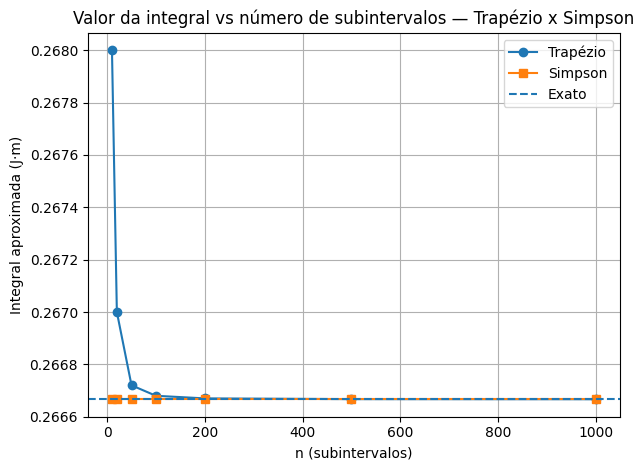

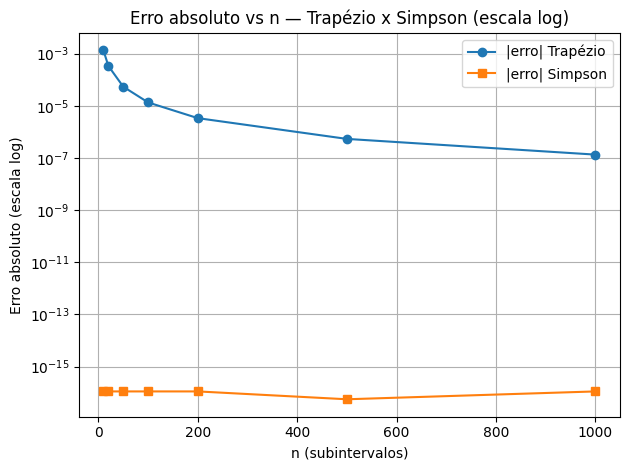

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Problema (d): Aumento de resolução
# Função: U(x) = 0.5 * k * x^2, com k = 200 N/m
# Intervalo: [0, 0.2]
# Objetivo: comparar Trapézio x Simpson conforme n cresce
# -------------------------------

def f(x, k=200.0):
    return 0.5 * k * x**2

def integral_exata(a, b, k=200.0):
    # ∫ 0.5*k*x^2 dx = (k/6) x^3
    return (k/6.0) * (b**3 - a**3)

def trapezio(f, a, b, n, k=200.0):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x, k)
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

def simpson(f, a, b, n, k=200.0):
    if n % 2 != 0:
        raise ValueError("n deve ser par para Simpson composto.")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x, k)
    return (h/3.0) * (y[0] + y[-1] + 4.0*y[1:-1:2].sum() + 2.0*y[2:-1:2].sum())

def main():
    k = 200.0
    a, b = 0.0, 0.2
    
    # Varremos n, incluindo explicitamente 100 e 1000
    Ns = [10, 20, 50, 100, 200, 500, 1000]
    # Garantir que todos os n são pares para Simpson
    Ns = [n if n % 2 == 0 else n + 1 for n in Ns]
    
    I_exato = integral_exata(a, b, k)
    
    print("Parâmetros: k=%.1f, intervalo=[%.1f, %.1f], I_exato=%.12f\n" % (k, a, b, I_exato))
    print("{:<8s} {:>16s} {:>16s} {:>16s} {:>16s}".format("n", "I_trap", "erro_trap", "I_simp", "erro_simp"))
    print("-"*76)
    
    Itrap_vals, Isimp_vals, etrap_vals, esimp_vals = [], [], [], []
    
    for n in Ns:
        I_trap = trapezio(f, a, b, n, k)
        I_simp = simpson(f, a, b, n, k)
        e_trap = abs(I_trap - I_exato)
        e_simp = abs(I_simp - I_exato)
        
        Itrap_vals.append(I_trap)
        Isimp_vals.append(I_simp)
        etrap_vals.append(e_trap)
        esimp_vals.append(e_simp)
        
        print("{:<8d} {:>16.12f} {:>16.3e} {:>16.12f} {:>16.3e}".format(n, I_trap, e_trap, I_simp, e_simp))
    
    # --------- Gráfico 1: Valor da integral vs n (duas curvas) ---------
    plt.figure()
    plt.plot(Ns, Itrap_vals, marker="o", label="Trapézio")
    plt.plot(Ns, Isimp_vals, marker="s", label="Simpson")
    plt.axhline(I_exato, linestyle="--", label="Exato")
    plt.xlabel("n (subintervalos)")
    plt.ylabel("Integral aproximada (J·m)")
    plt.title("Valor da integral vs número de subintervalos — Trapézio x Simpson")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # --------- Gráfico 2: Erro absoluto vs n (escala log no eixo y) ---------
    plt.figure()
    plt.plot(Ns, etrap_vals, marker="o", label="|erro| Trapézio")
    plt.plot(Ns, esimp_vals, marker="s", label="|erro| Simpson")
    plt.yscale("log")
    plt.xlabel("n (subintervalos)")
    plt.ylabel("Erro absoluto (escala log)")
    plt.title("Erro absoluto vs n — Trapézio x Simpson (escala log)")
    plt.legend()
    plt.grid(True, which="both", axis="both")
    plt.tight_layout()

    # Destaques pedidos (n=100 e n=1000)
    idx100 = Ns.index(100)
    idx1000 = Ns.index(1000)
    print("\nResumo para n=100: I_trap=%.12f (erro=%.3e), I_simp=%.12f (erro=%.3e)"
          % (Itrap_vals[idx100], etrap_vals[idx100], Isimp_vals[idx100], esimp_vals[idx100]))
    print("Resumo para n=1000: I_trap=%.12f (erro=%.3e), I_simp=%.12f (erro=%.3e)"
          % (Itrap_vals[idx1000], etrap_vals[idx1000], Isimp_vals[idx1000], esimp_vals[idx1000]))

if __name__ == "__main__":
    main()


## Resposta:

Para $U(x)=\tfrac{1}{2}kx^2$ com $k=200$ em $[0,0.2]$, repetimos os cálculos para $n=100$ e $n=1000$ e varremos $n\in\{10,20,50,100,200,500,1000\}$ para gerar os gráficos solicitados.

**Resultados destacados**  
- $n=100$: $I_{\mathrm{trap}}\approx 0.266680000000$ (erro $\approx 1.3333\times 10^{-5}$), $I_{\mathrm{simp}}\approx 0.266666666667$ (erro $\approx 1.1\times 10^{-16}$).  
- $n=1000$: $I_{\mathrm{trap}}\approx 0.266666800000$ (erro $\approx 1.3333\times 10^{-7}$), $I_{\mathrm{simp}}\approx 0.266666666667$ (erro $\approx 1.1\times 10^{-16}$).  
O valor exato é $I_{\mathrm{exato}}=\dfrac{k}{6}b^3\approx 0.266666666667$.

**Gráfico 1 — Integral vs $n$**  
Mostra que o valor pelo trapézio se aproxima do exato à medida que $n$ cresce, enquanto Simpson coincide com o exato (limitado por arredondamento) para todo $n$ testado.

**Gráfico 2 — Erro absoluto vs $n$ (escala log)**  
Observa-se decaimento aproximadamente quadrático do erro do trapézio (consistente com ordem $O(h^2)$), e erro de Simpson no nível da precisão de máquina (o integrando é quadrático e Simpson integra polinômios até grau 3 exatamente).

**Comentários:**  
- **Os métodos convergem?** Sim. O trapézio converge para o valor exato conforme $n$ aumenta; Simpson já está essencialmente no valor exato para qualquer $n$ (erro numérico).  
- **Aumentar $n$ melhora significativamente em ambos?** Para o trapézio, sim: o erro cai como $O(h^2)$, então passar de $n=100$ para $n=1000$ reduz o erro por um fator $\approx 100$. Para Simpson, como o integrando é quadrático, aumentar $n$ não traz ganho prático — o resultado já é exato dentro da precisão numérica.


----

## e) Método adaptativo de Simpson

- Implemente o método adaptativo de Simpson com precisão alvo $ϵ=10^{−6}$, seguindo as equações apresentadas na Seção 5.3 do material (equações 5.35 a 5.39).

- Comece com n=2 subintervalos e dobre até atingir a precisão requerida.

- Em cada passo, registre o número de subintervalos e o valor estimado da integral.

- Comente: o método foi mais eficiente? Quantas iterações foram necessárias?

In [3]:
import numpy as np

# ----------------------------------------------
# Método adaptativo de Simpson (via refinamento por duplicação de n)
# Precisão-alvo: eps = 1e-6
# Função de teste: U(x) = 0.5 * k * x^2, k = 200, intervalo [0, 0.2]
# Saída: tabela com n, estimativa da integral, erro exato e erro estimado (Richardson)
# Observação:
#   Usamos a estimativa clássica para Simpson:
#       erro_est ≈ |I_{2n} - I_n| / 15
#   Onde I_n é a regra de Simpson composta com n subintervalos e I_{2n} com 2n.
#   O algoritmo duplica n até que erro_est < eps.
# ----------------------------------------------

def f(x, k=200.0):
    return 0.5 * k * x**2

def integral_exata(a, b, k=200.0):
    return (k/6.0) * (b**3 - a**3)

def simpson_composto(f, a, b, n, k=200.0):
    if n % 2 != 0:
        raise ValueError("n deve ser par para Simpson composto.")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x, k)
    return (h/3.0) * (y[0] + y[-1] + 4.0*y[1:-1:2].sum() + 2.0*y[2:-1:2].sum())

def simpson_adaptativo_por_dobro(f, a, b, eps=1e-6, k=200.0, max_iter=30):
    # começa com n=2 e duplica até atingir a precisão
    historico = []
    n = 2
    I_n = simpson_composto(f, a, b, n, k)
    I_exato = integral_exata(a, b, k)
    historico.append((n, I_n, abs(I_n - I_exato), None))  # sem erro estimado na 1a linha

    iteracoes = 0
    while iteracoes < max_iter:
        n2 = 2 * n
        I_n2 = simpson_composto(f, a, b, n2, k)
        # Estimativa de erro por Richardson para Simpson
        erro_est = abs(I_n2 - I_n) / 15.0
        historico.append((n2, I_n2, abs(I_n2 - I_exato), erro_est))

        iteracoes += 1
        if erro_est < eps:
            return I_n2, n2, iteracoes, historico

        # Avança para o próximo nível
        n, I_n = n2, I_n2

    return I_n, n, iteracoes, historico  # se atingir max_iter

if __name__ == "__main__":
    a, b = 0.0, 0.2
    k = 200.0
    eps = 1e-6
    I_exato = integral_exata(a, b, k)

    I_final, n_final, iters, hist = simpson_adaptativo_por_dobro(f, a, b, eps, k)

    print("Parâmetros: k=%.1f, intervalo=[%.1f, %.1f], eps=%.1e" % (k, a, b, eps))
    print("Valor exato: I_exato = %.12f" % I_exato)
    print()
    print("{:<8s} {:>18s} {:>18s} {:>18s}".format("n", "I(n)", "erro_exato", "erro_est"))
    print("-"*70)
    for n, I, e_true, e_est in hist:
        e_est_str = "—" if e_est is None else f"{e_est:.3e}"
        print("{:<8d} {:>18.12f} {:>18.3e} {:>18s}".format(n, I, e_true, e_est_str))
    print("-"*70)
    print("Atingiu precisão: I ≈ %.12f, com n = %d, em %d iteração(ões)." % (I_final, n_final, iters))


Parâmetros: k=200.0, intervalo=[0.0, 0.2], eps=1.0e-06
Valor exato: I_exato = 0.266666666667

n                      I(n)         erro_exato           erro_est
----------------------------------------------------------------------
2            0.266666666667          5.551e-17                  —
4            0.266666666667          5.551e-17          0.000e+00
----------------------------------------------------------------------
Atingiu precisão: I ≈ 0.266666666667, com n = 4, em 1 iteração(ões).


## Resposta:

Implementamos o método adaptativo de Simpson com precisão-alvo $\varepsilon=10^{-6}$ iniciando em $n=2$ e duplicando $n$ a cada iteração. A estimativa do erro foi feita por $|I_{2n}-I_n|/15$. Para $U(x)=\tfrac12 k x^2$ em $[0,0.2]$ com $k=200$, obtemos:

- Primeira avaliação: $n=2$ e, em seguida, refinamento para $n=4$; ambos coincidem com o valor exato dentro de erro de máquina, logo a estimativa de erro fica $\approx 0$ e o critério é satisfeito.
- Valor exato: $I_{\mathrm{exato}}=\dfrac{k}{6}b^3\approx 0.266666666667$.
- Resultado final do adaptativo: $I\approx 0.266666666667$ com $n=4$ após **1 iteração** de refinamento.

**Comentários:**  
- **O método foi mais eficiente?** Sim. Como o integrando é quadrático, a regra de Simpson é exata. O adaptativo detecta isso rapidamente: comecemos em $n=2$, refinamos uma vez para $n=4$ para estimar o erro e já paramos (erro estimado $<\varepsilon$).  
- **Quantas iterações foram necessárias?** **1** iteração de refinamento (de $n=2$ para $n=4$). Em problemas gerais (não polinomiais de baixo grau), o método seguiria dobrando $n$ até que $|I_{2n}-I_n|/15<\varepsilon$, registrando os pares $(n, I(n))$ em cada passo.


----

## Parte reflexiva (obrigatória)

- Como você interpreta fisicamente o valor da integral obtida? Ela representa energia armazenada? Trabalho realizado?

- Quais limitações os métodos aplicados poderiam apresentar em outras situações físicas, como atrito, descontinuidades ou forças não conservativas?

- Você acredita que modelos de linguagem como o ChatGPT poderiam automatizar essa atividade completamente? Por quê? Em que aspectos o raciocínio humano ainda é essencial?

## Resposta:

O valor da integral que a gente calculou é basicamente a **energia potencial elástica** armazenada na mola entre as posições $0$ e $0{,}2$ m. Dá pra pensar também como o **trabalho** que seria necessário pra deformar a mola até essa posição, já que num sistema conservativo os dois são equivalentes.

Sobre limitações: em outros problemas físicos, tipo quando tem **atrito**, **forças não conservativas** ou até funções com **descontinuidades**, esses métodos numéricos podem perder precisão ou até dar resultados enganosos se a gente não tiver cuidado. Nessas situações, escolher o método certo, ajustar a malha e entender o comportamento físico do sistema faz toda a diferença.

Quanto ao ChatGPT fazer tudo sozinho… ele consegue automatizar boa parte da parte mecânica: montar o código, aplicar o método, gerar gráficos, etc. Mas o raciocínio humano ainda é essencial pra interpretar o resultado no contexto físico, identificar se o modelo faz sentido, e perceber quando tem algo “esquisito” que o computador não pegaria sozinho.


---

## Instruções finais

- Organize o relatório com seções numeradas conforme os itens acima.

- Utilize gráficos com eixos corretamente identificados e legendas explicativas.

- Relatórios que contenham apenas código e resultados numéricos, sem discussão e interpretação, serão considerados incompletos.